In [1]:
import json
import math
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import bigrams
from nltk import FreqDist
from nltk import ngrams
import numpy as np

# Preprocess

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
with open('./paper.json', 'r') as f:
    papers = json.load(f)

In [4]:
papers_50 = papers[0:50]

In [5]:
len(papers_50)

50

In [6]:
def get_stemmed_tokens(string_source):
    # word tokenize after lower the string
    word_tokens = word_tokenize(string_source.lower())
    # remove the punctuations
    word_tokens = [word.lower() for word in word_tokens if word.isalpha()]
    # stop words filter
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in word_tokens if not w in stop_words]
    # stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return stemmed_tokens

In [7]:
paper_token_freq = []
tokens = set()
for index in range(len(papers_50)):
    # print(index)
    paper_abstract = papers_50[index]['abstract']
    stemmed_tokens = get_stemmed_tokens(paper_abstract)
    token_freq = dict()
    # print(stemmed_tokens)
    # count the tokens in the stemmed_tokens
    for token in stemmed_tokens:
        tokens.add(token)
        if token in token_freq.keys():
            token_freq[token] = token_freq[token] + 1
        else:
            token_freq[token] = 1
    token_freq_sorted = sorted(token_freq.items(), key=lambda kv:kv[1], reverse=True)
    paper_token_freq.append(token_freq_sorted)

In [10]:
paper_token_freq[0][0]

('model', 5)

In [11]:
token2index = dict()
count = 0
for token in tokens:
    token2index[token] = count
    count = count + 1

In [12]:
# create the term-doc matrix

term_doc_mat = np.zeros([len(tokens), len(papers_50)])
term_doc_mat.shape

(1094, 50)

In [13]:
paper_token_freq[0][0][0]

'model'

In [15]:
for paper_index in range(len(paper_token_freq)):
    # print(paper_index)
    for token_freq in paper_token_freq[paper_index]:
        # print(token_freq)
        token = token_freq[0]
        freq = token_freq[1]
        token_index = token2index[token]
        print(paper_index, token, token_index, freq)
        term_doc_mat[token_index][paper_index] = freq

0 model 1042 5
0 gener 747 4
0 data 485 4
0 question 318 3
0 text 487 3
0 pattern 272 3
0 result 110 3
0 reason 233 2
0 logic 759 2
0 latent 609 2
0 paper 1043 1
0 focus 456 1
0 raw 114 1
0 low 689 1
0 resourc 385 1
0 circumst 22 1
0 syntact 783 1
0 valid 244 1
0 need 482 1
0 correl 851 1
0 answer 569 1
0 deduc 641 1
0 multipl 505 1
0 relat 442 1
0 sever 4 1
0 sentenc 839 1
0 specif 107 1
0 first 327 1
0 build 334 1
0 guid 588 1
0 satisfi 1048 1
0 ration 997 1
0 chain 248 1
0 extract 85 1
0 given 295 1
0 sinc 887 1
0 label 554 1
0 limit 81 1
0 insuffici 647 1
0 train 390 1
0 propos 225 1
0 learn 885 1
0 help 767 1
0 larg 560 1
0 scale 340 1
0 unlabel 196 1
0 much 1014 1
0 easier 498 1
0 obtain 370 1
0 contain 10 1
0 rich 70 1
0 express 145 1
0 form 154 1
0 structur 514 1
0 syntax 799 1
0 semant 833 1
0 estim 865 1
0 neural 361 1
0 hidden 56 1
0 use 825 1
0 variabl 908 1
0 prior 1076 1
0 regular 412 1
0 produc 950 1
0 optim 931 1
0 experiment 965 1
0 hotpotqa 149 1
0 set 679 1
0 demonst

15 defin 812 1
15 convers 756 1
15 context 1018 1
15 influenc 873 1
15 languag 572 1
15 individu 74 1
15 show 663 1
15 outperform 893 1
15 competit 610 1
15 baselin 121 1
15 provid 958 1
15 psycholinguist 1077 1
15 insight 240 1
16 model 1042 9
16 answer 569 7
16 question 318 5
16 qa 210 5
16 data 485 4
16 abstain 392 3
16 accuraci 20 3
16 train 390 2
16 error 700 2
16 like 739 2
16 abstent 642 2
16 domain 697 2
16 test 1027 2
16 mixtur 31 2
16 maintain 900 2
16 probabl 17 2
16 input 781 2
16 calibr 681 2
16 method 449 2
16 avoid 45 1
16 give 844 1
16 wrong 1091 1
16 need 482 1
16 know 61 1
16 moreov 627 1
16 user 1019 1
16 often 382 1
16 ask 1022 1
16 diverg 16 1
16 make 1015 1
16 thu 203 1
16 critic 805 1
16 work 674 1
16 propos 225 1
16 set 679 1
16 select 363 1
16 shift 501 1
16 must 15 1
16 mani 639 1
16 possibl 159 1
16 high 622 1
16 polici 223 1
16 base 1063 1
16 sole 565 1
16 softmax 427 1
16 fare 946 1
16 poorli 951 1
16 sinc 887 1
16 overconfid 213 1
16 instead 179 1
16 ident

32 sequenc 342 1
32 infer 168 1
32 step 548 1
32 categori 814 1
32 document 635 1
32 top 57 1
32 bottom 1031 1
32 given 295 1
32 taxonomi 375 1
32 focus 456 1
32 develop 158 1
32 novel 1090 1
32 neural 361 1
32 network 419 1
32 architectur 239 1
32 deal 320 1
32 structur 514 1
32 prefer 849 1
32 look 288 1
32 way 30 1
32 strengthen 118 1
32 baselin 121 1
32 model 1042 1
32 first 327 1
32 defin 812 1
32 problem 883 1
32 afterward 597 1
32 propos 225 1
32 synthet 784 1
32 extern 429 1
32 dictionari 250 1
32 retriev 598 1
32 textual 90 1
32 definit 1052 1
32 hierarchi 717 1
32 map 973 1
32 word 1064 1
32 vector 544 1
32 space 261 1
32 embed 141 1
32 condit 298 1
32 next 266 1
32 adapt 500 1
32 beam 326 1
32 wherea 103 1
32 modifi 1082 1
32 provid 958 1
32 larg 560 1
32 gain 979 1
32 combin 211 1
32 significantli 1009 1
32 enhanc 322 1
32 accuraci 20 1
32 approach 415 1
32 outperform 893 1
32 previou 525 1
32 drastic 401 1
32 reduc 395 1
32 number 1047 1
32 paramet 69 1
32 two 963 1
32 eng

49 algerian 307 1
49 arab 14 1
49 known 100 1
49 frequent 123 1
49 usag 1084 1
49 fulli 153 1
49 univers 538 1
49 syntax 799 1
49 full 804 1
49 translat 929 1
49 word 1064 1
49 level 432 1
49 freeli 424 1
49 avail 506 1
49 supplement 917 1
49 collect 875 1
49 common 832 1
49 crawl 703 1
49 intens 6 1
49 techniqu 238 1
49 preliminari 684 1
49 experi 466 1
49 demonstr 676 1
49 po 511 1
49 tag 1051 1
49 pars 837 1
49 believ 836 1
49 present 518 1
49 paper 1043 1
49 beyond 670 1
49 commun 576 1
49 time 26 1
49 enough 402 1
49 provid 958 1
49 emerg 142 1
49 rich 70 1
49 morpholog 19 1
49 code 876 1
49 switch 333 1
49 make 1015 1
49 challeng 766 1
49 recent 1056 1
49 nlp 484 1
49 approach 415 1


#### normalize

In [16]:
for c in range(term_doc_mat.shape[1]):
    l2_norm = np.linalg.norm(term_doc_mat[:,c])
    # print(c, l2_norm)
    term_doc_mat[:,c] = term_doc_mat[:,c]/l2_norm

In [19]:
term_doc_mat[token2index['knowledg']]

array([0.        , 0.        , 0.        , 0.17609018, 0.        ,
       0.        , 0.        , 0.        , 0.15476465, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.1062988 , 0.        , 0.07495317,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07018624, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.58658846, 0.        , 0.        , 0.        ])

In [20]:
term_doc_mat[token2index['model']]

array([0.37796447, 0.        , 0.        , 0.17609018, 0.41812101,
       0.20412415, 0.        , 0.21428571, 0.38691162, 0.15665209,
       0.        , 0.3592106 , 0.        , 0.        , 0.32929278,
       0.28603878, 0.51116565, 0.12171612, 0.17087153, 0.31980107,
       0.0751646 , 0.1069045 , 0.14704292, 0.21997067, 0.4       ,
       0.19156526, 0.28074496, 0.6909422 , 0.42874646, 0.14990634,
       0.29704426, 0.10482848, 0.09053575, 0.31799936, 0.4417261 ,
       0.        , 0.3509312 , 0.24174689, 0.24019223, 0.3125    ,
       0.08421519, 0.        , 0.29488391, 0.19900744, 0.        ,
       0.1833397 , 0.14664712, 0.        , 0.38124643, 0.        ])

# SVD

In [26]:
u, s, vh = np.linalg.svd(term_doc_mat, full_matrices=False)

In [27]:
s

array([2.86096186, 1.3653995 , 1.27032358, 1.22987015, 1.19443846,
       1.17806692, 1.15387011, 1.12738649, 1.09528575, 1.07138045,
       1.06540577, 1.05129034, 1.04110368, 1.01120723, 0.99593028,
       0.98741442, 0.97725382, 0.9746004 , 0.96690456, 0.94757842,
       0.93954294, 0.93568809, 0.92170802, 0.91380586, 0.89307389,
       0.88637231, 0.88359827, 0.87342525, 0.85572452, 0.84734158,
       0.8404466 , 0.83379732, 0.8260985 , 0.81362107, 0.79924362,
       0.7853955 , 0.77452919, 0.77164883, 0.76060635, 0.74874168,
       0.73608489, 0.72600944, 0.71404007, 0.70582593, 0.69096365,
       0.686157  , 0.66801739, 0.66629895, 0.61695201, 0.59705741])

In [28]:
print(u.shape, s.shape, vh.shape)

(1094, 50) (50,) (50, 50)


In [36]:
u_2 = u[:,0:2]
s_2 = s[0:2]
vh_2 = vh[0:2,:]

In [41]:
u_2.shape

(1094, 2)

In [42]:
s_2

array([2.86096186, 1.3653995 ])

In [43]:
vh_2.shape

(2, 50)

In [44]:
# reconstrut with rank 2
term_doc_mat_2 = np.dot(u_2 * s_2, vh_2)

In [45]:
term_doc_mat_2[0]

array([ 0.00697243, -0.00811431, -0.00532235, -0.00197454,  0.01068318,
        0.01161913, -0.00696591,  0.00165031,  0.01174326,  0.00252241,
       -0.00302361,  0.00626328, -0.00662105, -0.00510015,  0.00715214,
        0.00948894,  0.01572016,  0.00134019,  0.00123861,  0.01114175,
       -0.00267239,  0.00181414, -0.00027136,  0.002495  ,  0.01233359,
       -0.00246744,  0.00804274,  0.01885076,  0.01393888,  0.00703787,
        0.00495371, -0.00535733,  0.00105639,  0.00753421,  0.00779568,
       -0.00420969,  0.00738203,  0.00787108,  0.00575727,  0.00886788,
       -0.00077753, -0.00350003,  0.0094726 ,  0.00162726, -0.0034297 ,
        0.00411899,  0.00239836, -0.00826835,  0.00897435, -0.00476588])

In [46]:
term_doc_mat_2.shape

(1094, 50)

# Query

In [32]:
query = get_stemmed_tokens('knowledge graph')
query

['knowledg', 'graph']

In [33]:
query_vec = np.zeros([term_doc_mat_2.shape[0]])
query_vec.shape

(1094,)

In [34]:
query_vec[token2index['knowledg']] = 1.0
query_vec[token2index['graph']] = 1.0

In [35]:
print(query_vec[token2index['knowledg']], query_vec[token2index['graph']])

1.0 1.0


# Mapping query to rank-2 space

In [49]:
s_2_mat = np.diag(s_2)
s_2_mat

array([[2.86096186, 0.        ],
       [0.        , 1.3653995 ]])

In [50]:
# compute the inv of s_2
s_inv = np.linalg.inv(s_2_mat)
s_inv

array([[0.3495328 , 0.        ],
       [0.        , 0.73238638]])

In [ ]:
u d t(v)

In [53]:
query_vec_2 = np.dot(np.dot(query_vec.T, u_2), s_inv)
query_vec_2

array([-0.0371808 , -0.04075829])

# Compute cos

In [56]:
vh_2.shape

(2, 50)

In [67]:
# compute inner product
np.dot(query_vec_2, vh_2).shape

(50,)

In [57]:
np.dot(query_vec_2, vh_2).shape

(50,)

In [58]:
query_vec_2.shape

(2,)

In [61]:
query_vec_2

array([-0.0371808 , -0.04075829])

In [60]:
# compute l2_norm of query
query_vec_2_norm = np.linalg.norm(query_vec_2)
query_vec_2_norm

0.05516928648255209

In [66]:
# compute l2_norm of vh_2
vh_2_norm = np.linalg.norm(vh_2, axis=0)
vh_2_norm

array([0.20174977, 0.27456174, 0.22248241, 0.24983308, 0.2174912 ,
       0.22078464, 0.25952688, 0.14012625, 0.22746821, 0.1325822 ,
       0.14369121, 0.17456237, 0.21062667, 0.21443231, 0.18055046,
       0.17967539, 0.29752757, 0.08367503, 0.15293573, 0.21410344,
       0.14629374, 0.1018657 , 0.20775419, 0.17301232, 0.23878486,
       0.23394927, 0.16703174, 0.3567018 , 0.26609081, 0.14403617,
       0.15051523, 0.25865527, 0.16531627, 0.19507977, 0.185571  ,
       0.14652253, 0.22480121, 0.15222304, 0.12488625, 0.16981437,
       0.18091916, 0.15457465, 0.17922928, 0.15072183, 0.1792327 ,
       0.1265568 , 0.13909051, 0.30391799, 0.20642174, 0.20569964])

In [69]:
(query_vec_2_norm * vh_2_norm).shape

(50,)

In [70]:
# compute cos
similarities = np.dot(query_vec_2, vh_2) / (query_vec_2_norm * vh_2_norm)

In [71]:
similarities

array([ 0.70514207, -0.49991428, -0.38925342, -0.08012003,  0.95290003,
        0.98686457, -0.44644639,  0.29037549,  0.98937496,  0.42425238,
       -0.33310164,  0.7284993 , -0.53717996, -0.38655397,  0.79391288,
        0.99952375,  0.99554765,  0.36886327,  0.22187839,  0.99441873,
       -0.27925277,  0.40189678,  0.04516554,  0.33937997,  0.98970219,
       -0.1306334 ,  0.93762527,  0.99656906,  0.99799914,  0.94886865,
        0.6758419 , -0.32668208,  0.18993838,  0.77663652,  0.83528603,
       -0.48366097,  0.67452861,  0.99041457,  0.90427789,  0.9964103 ,
       -0.01150859, -0.36427163,  0.99755822,  0.27214636, -0.29607251,
        0.66933092,  0.39147694, -0.45362384,  0.86030206, -0.3745371 ])

# Sort and rank

In [72]:
(-similarities).argsort()

array([15, 28, 42, 27, 39, 16, 19, 37, 24,  8,  5,  4, 29, 26, 38, 48, 34,
       14, 33, 11,  0, 30, 36, 45,  9, 21, 46, 17, 23,  7, 43, 18, 32, 22,
       40,  3, 25, 20, 44, 31, 10, 41, 49, 13,  2,  6, 47, 35,  1, 12])

# Plot

In [74]:
u_2.shape, vh_2.shape, query_vec_2.shape

((1094, 2), (2, 50), (2,))

In [80]:
vh_2[0,:].shape

(50,)

In [76]:
import matplotlib.pyplot as plt

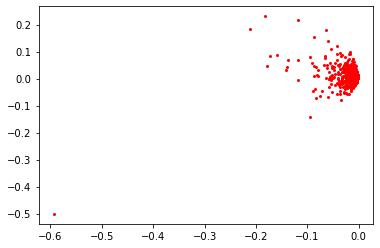

In [96]:
plt.scatter(u_2[:,0], u_2[:,1], c='red', s=4)
plt.show()

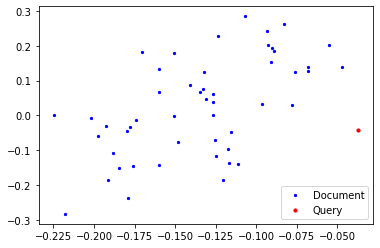

In [95]:
plt.scatter(vh_2[0,:], vh_2[1,:], c='blue', s=5, label='Document')
plt.scatter(query_vec_2[0], query_vec_2[1], c='red', s=10, label='Query')
plt.legend(loc='lower right')
plt.show()

### Useful debugging code

In [29]:
similaries = []
for i in range(term_doc_mat.shape[1]):
    s = np.dot(query_vec, term_doc_mat[:,i]) / (np.linalg.norm(query_vec) * np.linalg.norm(term_doc_mat[:,i]))
    # print(i,s)
    similaries.append(s)

In [30]:
sim = np.array(similaries)
(-sim).argsort()

array([46,  3,  8, 27, 29, 36,  0, 28, 30, 31, 32, 33, 34, 35, 38, 39, 40,
       41, 42, 43, 44, 45, 47, 37, 26, 24, 48,  1,  2,  4,  5,  6,  7,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 49])

In [73]:
paper_token_freq[15]

[('depress', 4),
 ('interview', 4),
 ('model', 3),
 ('latent', 3),
 ('assess', 2),
 ('pattern', 2),
 ('propos', 2),
 ('categor', 2),
 ('prompt', 2),
 ('categori', 2),
 ('accur', 1),
 ('diagnos', 1),
 ('requir', 1),
 ('analysi', 1),
 ('henc', 1),
 ('autom', 1),
 ('method', 1),
 ('linguist', 1),
 ('could', 1),
 ('help', 1),
 ('psychiatr', 1),
 ('profession', 1),
 ('make', 1),
 ('faster', 1),
 ('inform', 1),
 ('decis', 1),
 ('diagnosi', 1),
 ('jlpc', 1),
 ('analyz', 1),
 ('transcript', 1),
 ('identifi', 1),
 ('jointli', 1),
 ('allow', 1),
 ('defin', 1),
 ('convers', 1),
 ('context', 1),
 ('influenc', 1),
 ('languag', 1),
 ('individu', 1),
 ('show', 1),
 ('outperform', 1),
 ('competit', 1),
 ('baselin', 1),
 ('provid', 1),
 ('psycholinguist', 1),
 ('insight', 1)]